# Bayesian inference of risk using JAGS

In [1]:
library(MCMCvis)
library(rjags)

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



## Categorical values for severity and likelihood

In [2]:
# Probability of the classes (assumed to be evenly spaced)
alpha_severity <- c(0.6, 0.4)
alpha_likelihood <- c(0.2, 0.7, 0.1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 2
   Total graph size: 14

Initializing model



,mean,sd,2.5%,50%,97.5%,Rhat,n.eff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
l,1.91,0.48,1.00,2.00,3.00,1.03,200
r,0.43,0.18,0.17,0.33,0.67,1.01,241
s,1.35,0.48,1.00,1.00,2.00,1.00,200


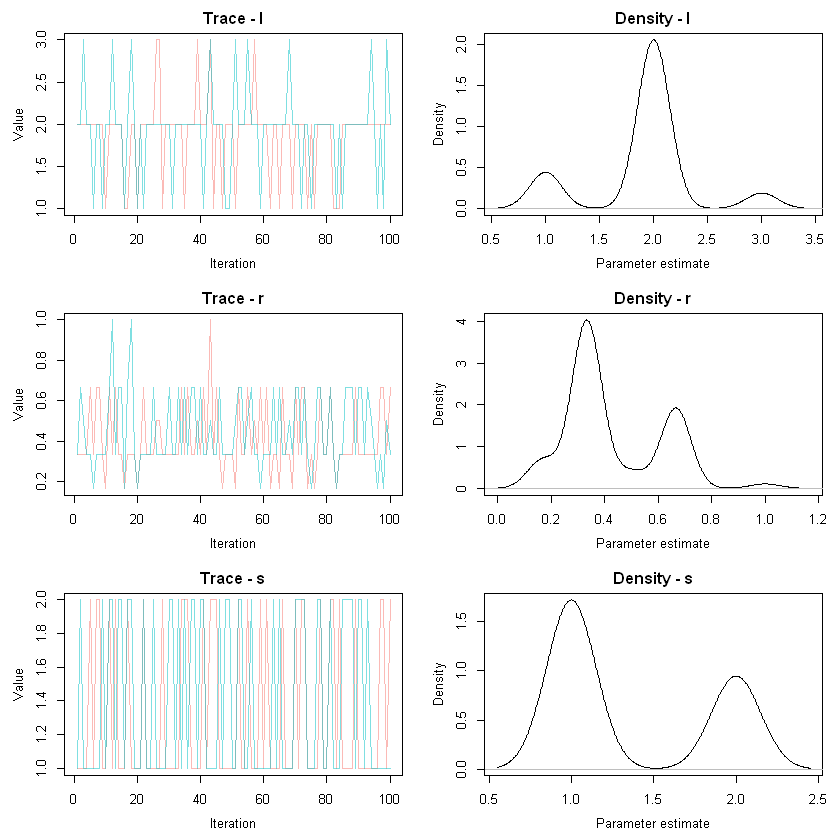

In [3]:
model_string = "
model {
    s ~ dcat(alpha_severity)
    l ~ dcat(alpha_likelihood)

    # Risk = severity * likelihood
    r = s/2 * l/3
}
"

model = jags.model(textConnection(model_string),
                   n.chains = 2,
                   data = list(alpha_severity=alpha_severity, alpha_likelihood=alpha_likelihood))

samp = coda.samples(model, 
                    variable.names=c("s", "l", "r"), 
                    n.iter=100, progress.bar="none")

# Show a summary of the variables
MCMCsummary(samp, round = 2)

# Show plots
MCMCtrace(samp, pdf=FALSE)

## Impact and threat

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 0
   Unobserved stochastic nodes: 2
   Total graph size: 7

Initializing model



,mean,sd,2.5%,50%,97.5%,Rhat,n.eff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
x,0.8,0.03,0.75,0.8,0.85,1,20000
y,0.5,0.03,0.45,0.5,0.55,1,19845
z,0.4,0.03,0.35,0.4,0.45,1,20000


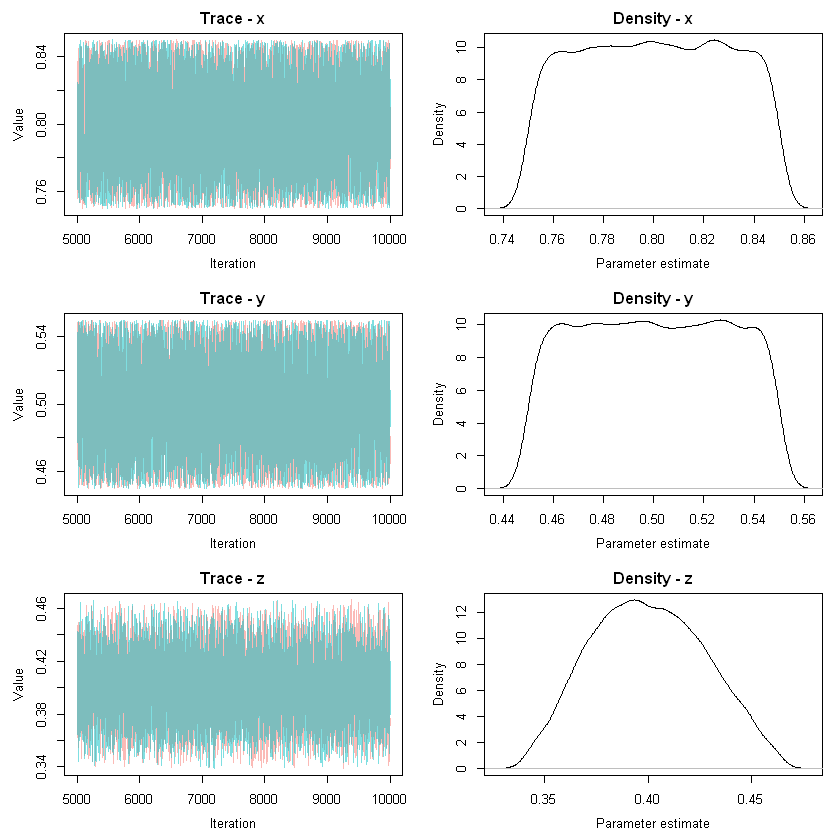

In [9]:
model_string = "
model {
    x ~ dunif(0.75, 0.85)
    y ~ dunif(0.45, 0.55)
    z <- x*y
}
"

model = jags.model(textConnection(model_string),
                   n.chains = 2,
                   data = list())

samp = coda.samples(model, 
                    variable.names=c("x", "y", "z"), 
                    n.iter=10000, progress.bar="none")

# Show a summary of the variables
MCMCsummary(samp, round = 2)

# Show plots
MCMCtrace(samp, pdf=FALSE)